# Stellar Classification 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv("../input/stellar-classification-dataset-sdss17/star_classification.csv")
df.shape

(100000, 18)

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
# Checking for value counts of target class
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [5]:
# Removing instances of QSO to convert the problem to binary classification
indices_qso = df[df["class"] == "QSO"].index
df = df.drop(indices_qso, axis=0).reset_index(drop=True)

In [6]:
# Splitting the data
y = df["class"]
X = df.drop(["class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [7]:
# Resetting indices of the dataframes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [8]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [9]:
# Checking for null values
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

# Data Storytelling

In [10]:
df_train.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,6.077900e+04,60779.000000,60779.000000,60779.000000,60779.000000,60779.000000,60779.000000,60779.000000,60779.000000,60779.0,60779.000000,60779.000000,6.077900e+04,60779.000000,60779.00000,60779.000000,60779.00000
mean,1.237665e+18,177.082850,23.524924,22.035116,20.392758,19.415206,18.768676,18.252162,4457.525313,301.0,3.508021,188.059675,5.304665e+18,0.308270,4711.38148,55341.011040,439.81775
std,8.383167e+12,95.856876,19.569546,40.717828,40.700433,1.922102,1.738424,40.668952,1951.866890,0.0,1.589006,152.355454,3.183873e+18,0.293288,2827.83044,1774.374317,269.13134
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.00000,51608.000000,1.00000
25%,1.237659e+18,127.403629,4.689109,20.227675,18.581345,17.720840,17.325320,17.059345,3180.000000,301.0,2.000000,82.000000,2.501857e+18,0.000308,2222.00000,53846.000000,215.00000
50%,1.237663e+18,180.173364,22.577577,22.486100,21.122370,19.805180,19.056910,18.658040,4192.000000,301.0,4.000000,147.000000,5.110535e+18,0.243284,4539.00000,55659.000000,421.00000
75%,1.237668e+18,233.470762,38.723053,23.954135,22.261235,20.886880,19.965335,19.511425,5322.000000,301.0,5.000000,242.000000,7.583062e+18,0.541287,6735.00000,56485.000000,628.00000
max,1.237681e+18,359.999031,82.947622,30.660390,30.607000,29.571860,30.250090,29.383740,8162.000000,301.0,6.000000,989.000000,1.412693e+19,1.995524,12547.00000,58932.000000,1000.00000


In [11]:
def plot_violin(x, y):
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x=x, y=y)
    plt.show()
    return

**obj_ID**

* Feature obj_ID gives the unique identifier for the observation.


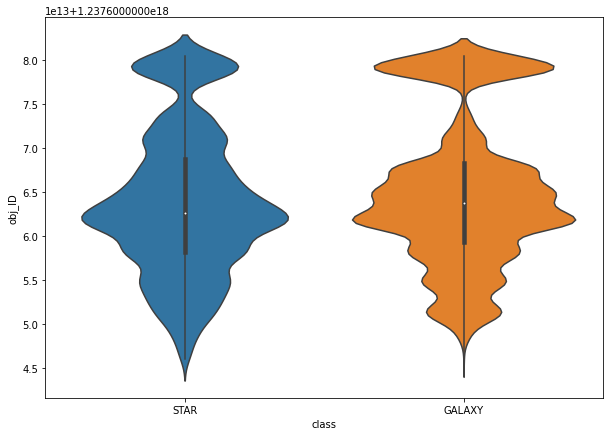

In [12]:
plot_violin(x=df_train["class"], y=df_train["obj_ID"])

* From the violin plot it can be said that, value of obj_ID doesn't contribute in classifying Star or Galaxy.
* This feature will be removed.

**alpha**

* Feature alpha gives the right ascension angle from the measured point.
* Since it is an angle it will range between 0-360.

In [13]:
# Checking for negative alpha values
df_train[df_train["alpha"] < 0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class


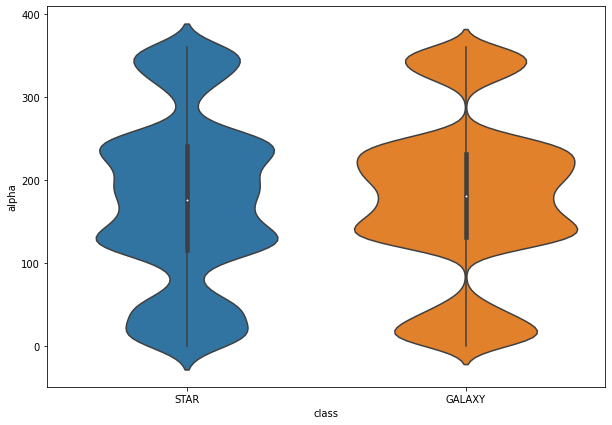

In [14]:
plot_violin(x=df_train["class"], y=df_train["alpha"])

In [15]:
df_train[(df_train["alpha"] < 100) & (df_train["alpha"] < 100)]["class"].value_counts()

GALAXY    7590
STAR      3496
Name: class, dtype: int64

* From the violin plot it can be concluded that values of alpha doesn't contribute in classifying Star and Galaxy.
* So, classification of star and galaxy doesn't depend on the right ascention angle.

**delta**

* Feature delta gives the declination angle from the measured point.
* Since it is an angle it will range between 0-360.

In [16]:
# Angles can not be negative
df_train[df_train["delta"] < 0]

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
5,1.237653e+18,5.352621,-10.547256,21.05956,18.66894,17.62082,17.17562,16.82576,1740,301,2,57,7.340939e+17,0.146722,652,52138,26,GALAXY
11,1.237679e+18,18.239643,-3.674605,23.03531,21.49829,21.17477,21.31684,20.81041,7907,301,1,193,7.932170e+18,-0.000199,7045,56577,747,STAR
18,1.237650e+18,179.798359,-1.707060,17.58636,16.55747,16.23842,16.09514,15.98957,1140,301,5,180,3.727774e+17,0.020342,331,52368,380,GALAXY
19,1.237680e+18,358.523950,-6.665565,23.06075,21.18152,19.31114,18.72232,18.34695,8100,301,5,310,8.045936e+18,0.329238,7146,56573,930,GALAXY
25,1.237647e+18,101.016406,-0.757913,16.76548,15.32125,14.72048,14.46915,14.33289,307,301,1,167,8.171855e+18,0.000075,7258,56605,266,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60758,1.237655e+18,231.731846,-0.930302,20.83543,19.12617,17.96684,17.37004,16.85985,2334,301,5,240,1.040498e+18,0.122059,924,52409,606,GALAXY
60762,1.237655e+18,170.088632,-2.758051,23.62615,22.07880,20.69353,19.71074,19.12479,2194,301,3,400,4.249246e+18,0.631691,3774,55244,361,GALAXY
60767,1.237679e+18,11.290894,-2.754682,23.39168,22.69824,22.15433,21.45803,20.71816,7907,301,3,147,1.052625e+19,0.778587,9349,58068,765,GALAXY
60771,1.237679e+18,7.512619,-4.258753,22.06879,20.53684,18.72931,18.00365,17.59588,7824,301,5,366,7.925365e+18,0.390636,7039,56572,564,GALAXY


In [17]:
# Removing above obeservations
indices = df_train[df_train["delta"] < 0].index
df_train.drop(indices, inplace=True)

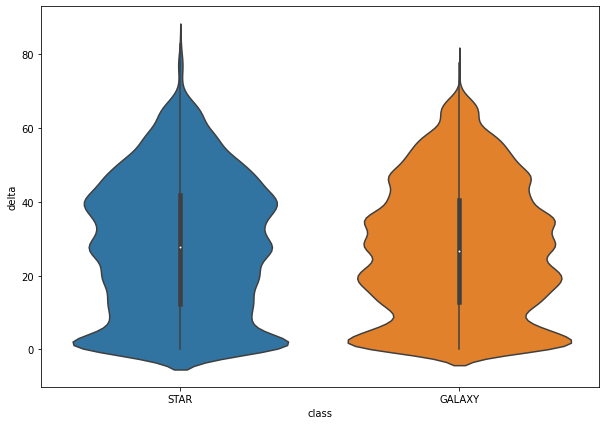

In [18]:
plot_violin(x=df_train["class"], y=df_train["delta"])

* From the violin plot it can be concluded that values of delta doesn't contribute in classifying Star and Galaxy.
* So, classification of star and galaxy doesn't depend on the declination angle.

**u**

* Feature 'u' is Ultraviolet filter in the photometric system.


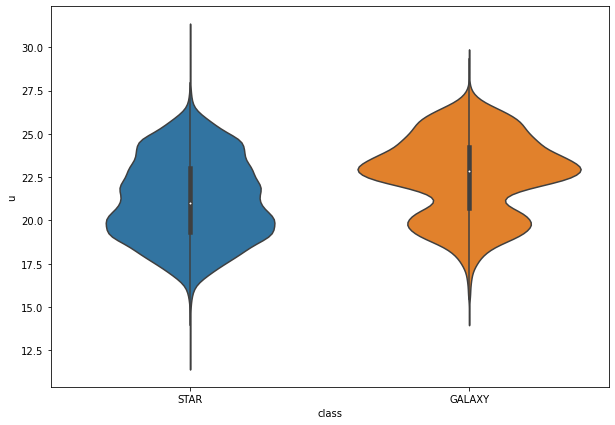

In [19]:
plot_violin(x=df_train["class"], y=df_train["u"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-21 of feature 'u'.
* And, majority of Galaxies can be found in the range 21-28 of feature 'u'.

**g**

* Feature 'g' is Green filter in the photometric system.

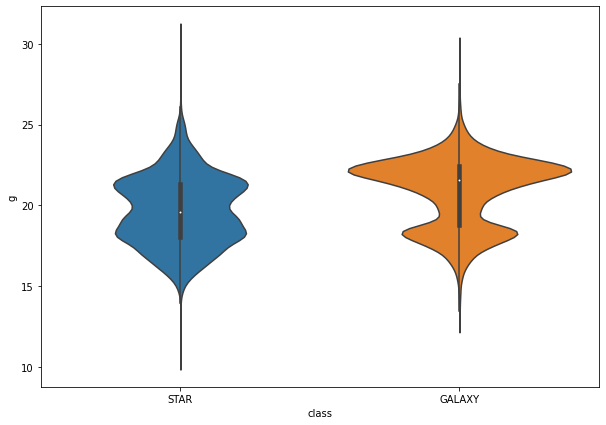

In [20]:
plot_violin(x=df_train["class"], y=df_train["g"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-20 of 'g'.
* And, majority of Galaxies can be found in the range 20-25 of feature 'g'.

**r**

* Feature 'r' is Red filter in the photometric system.

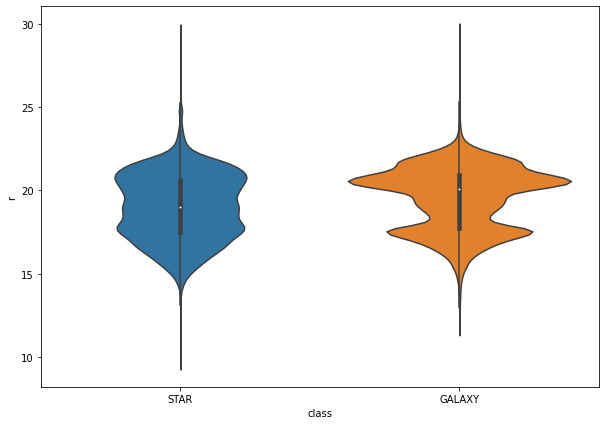

In [21]:
plot_violin(x=df_train["class"], y=df_train["r"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-18 of 'r'.
* And, majority of Galaxies can be found in the range 18-25 of feature 'r'.

**i**

* Feature 'i' is Near Infrared filter in the photometric system

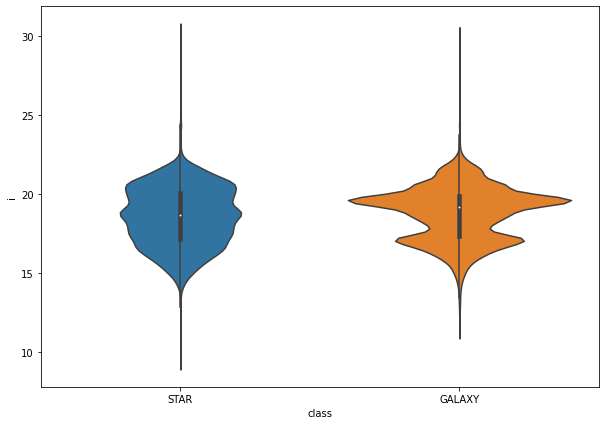

In [22]:
plot_violin(x=df_train["class"], y=df_train["i"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-18 of 'i'.
* And, majority of Galaxies can be found in the range 18-22 of feature 'i'.

**z**

* Feature 'z' is Infrared filter in the photometric system.

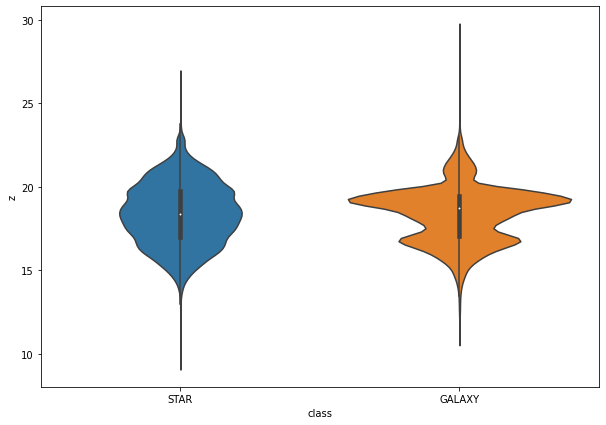

In [23]:
plot_violin(x=df_train["class"], y=df_train["z"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-17 of 'z'.
* And, majority of Galaxies can be found in the range 17-22 of feature 'z'.
* Since features 'u', 'g', 'r', 'i', and 'z' have similar violin plots, They all have strong correlation with each other. 

**run_ID**

* Feature 'run_ID' is Run Number used to identify the specific scan.

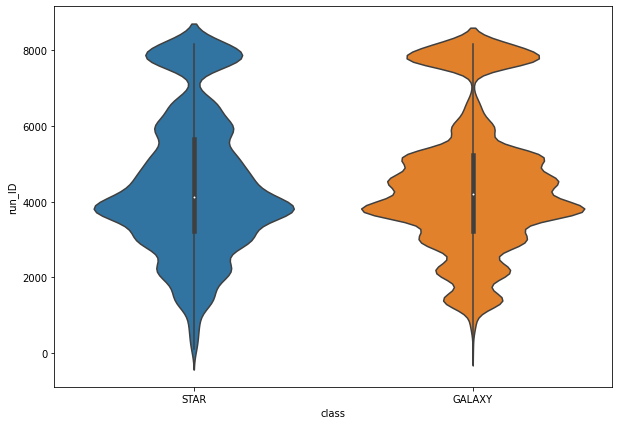

In [24]:
plot_violin(x=df_train["class"], y=df_train["run_ID"])

* From the violin plot, it can be concluded that, the value of feature 'run_ID' doesn't affect the classification of Star and Galaxy.
* It is a number which is unique for all observations.
* I will remove this feature.

**rerun_ID**

* Feature 'rerun_ID' is Rerun Number to specify how the image was processed

In [25]:
df_train["rerun_ID"].value_counts()

301    53073
Name: rerun_ID, dtype: int64

* The value of 'rerun_ID' is same for all the observations.
* This feature doesn't give any information. So, I will remove it

**cam_col**

* Feature 'cam_col' is Camera column to identify the scanline within the run.

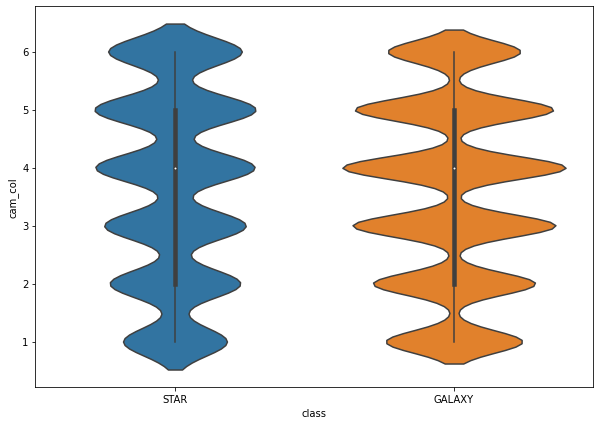

In [26]:
plot_violin(x=df_train["class"], y=df_train["cam_col"])

* From the plot, it can be concluded that, the value of feature 'cam-col' doesn't help in classifying Star or Galaxy.
* This feature doesn't give related information, so I will remove it.

**field_ID**

* Feature 'field_ID' is Field number to identify each field.

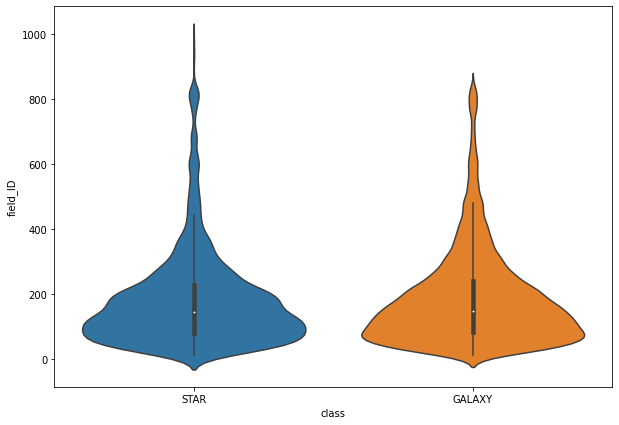

In [27]:
plot_violin(x=df_train["class"], y=df_train["field_ID"])

* From the plot, it can be concluded that, the value of feature 'field_ID' doesn't help in classifying Star or Galaxy.
* This feature doesn't give related information, so I will remove it.

**spec_obj_ID**

* Feature 'spec_obj_ID' is Unique ID used for optical spectroscopic objects.

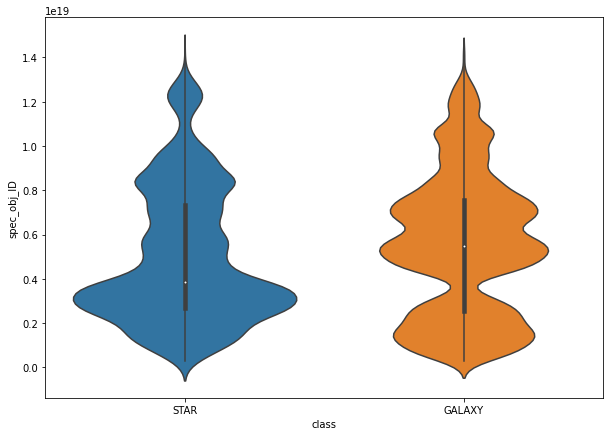

In [28]:
plot_violin(x=df_train["class"], y=df_train["spec_obj_ID"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-0.5 of 'spec_obj_ID'.
* And, majority of Galaxies can be found in the range 0.5-1.4 of feature 'spec_obj_ID'.

**redshift**

* Feature 'redshift' is redshift value based on the increase in wavelength.

In [29]:
df_train[df_train["redshift"] > 0]["class"].value_counts()

GALAXY    38765
STAR       4786
Name: class, dtype: int64

In [30]:
df_train[df_train["redshift"] < 0]["class"].value_counts()

STAR      9218
GALAXY      24
Name: class, dtype: int64

* In the 'redshift' feature, if the value is negative(blueshift), the observation is more likely to be a Star.
* If the value is positive(redshift), the observation is more likely to be Galaxy.

**plate**

* Feature 'plate' is plate ID, identifies each plate in SDSS.

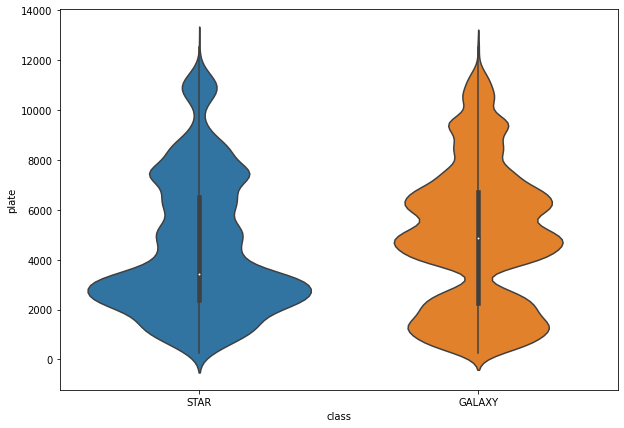

In [31]:
plot_violin(x=df_train["class"], y=df_train["plate"])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-4000 of 'plate'.
* And, majority of Galaxies can be found in the range 4000-9000 of feature 'plate'.

**MJD**

* Feature 'MJD' is Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* Since feature 'MJD' is a form of Date, it shouldn't be used for modeling.
* Because observation of Star and Galaxy can be taken any day. So, there can't be any relationship. So, I will remove this feature.

**fiber_ID**

* Feature 'fiber_ID' is fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

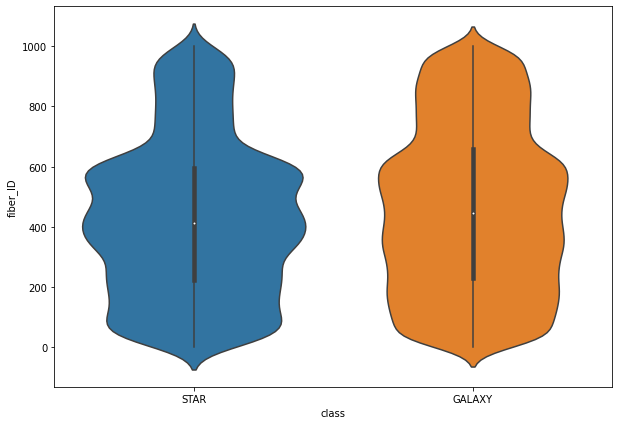

In [32]:
plot_violin(x=df_train["class"], y=df_train["fiber_ID"])

* From the plot, it can be concluded that, the value of feature 'fiber_ID' doesn't help in classifying Star or Galaxy.
* This feature doesn't give related information, so I will remove it.

In [33]:
# Features to be removed
rem_features = ["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "MJD", "fiber_ID"]

In [34]:
# Removing the feature from train and test datasets
df_train.drop(rem_features, axis=1, inplace=True)
df_test.drop(rem_features, axis=1, inplace=True)

In [35]:
df_train.head()

,alpha,delta,u,g,r,i,z,spec_obj_ID,redshift,plate,class
0,334.679040,21.169516,25.83200,20.55408,19.34140,18.85914,18.59964,6.694696e+18,-0.000178,5946,STAR
1,238.056762,45.442007,22.92695,21.46420,20.13274,19.27257,18.77534,6.792699e+18,0.562084,6033,GALAXY
2,5.883751,32.877036,22.03252,22.41991,20.80431,19.57834,19.19754,8.027741e+18,0.567183,7130,GALAXY
3,198.578340,0.596728,18.73976,17.86670,17.57418,17.46029,17.43071,8.394942e+18,0.000745,7456,STAR
4,121.822755,36.007840,17.30062,16.33586,15.97503,15.82379,15.80010,4.279548e+18,0.000047,3801,STAR


# Handling Multicollinearity

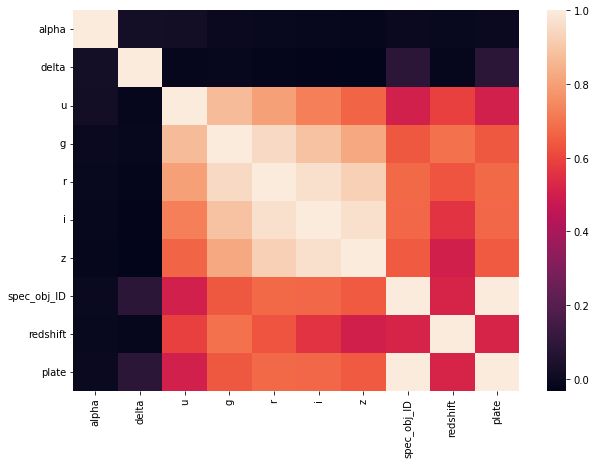

In [36]:
# Checking for multicollinearity
fig = plt.figure(figsize=(10, 7))
sns.heatmap(df_train.corr())
plt.show()

* Muticollinearity exists between features - ('u' and 'g'), ('g', 'r', 'i'), ('z', 'g', 'r', 'i'), ('spec_obj_ID' and 'plate')
* I will remove features - 'g', 'r', 'i', 'spec_obj_ID'.

In [37]:
# Removing correlated features.
df_train.drop(["g", "r", "i", "spec_obj_ID"], axis=1, inplace=True)
df_test.drop(["g", "r", "i", "spec_obj_ID"], axis=1, inplace=True)

# Handling Imbalance Data

In [38]:
df_train["class"].value_counts()

GALAXY    39069
STAR      14004
Name: class, dtype: int64

In [39]:
# Using combination of Undersampling and SMOTE

# Undersampling (majority class - 30000)
under_sampling = RandomUnderSampler(sampling_strategy={"GALAXY": 30000}, random_state=42)

# SMOTE (minority class - 30000)
smote = SMOTE(sampling_strategy={"STAR": 30000}, random_state=42)

In [40]:
# Seprating target and predictors
y_train = df_train["class"]
X_train = df_train.drop("class", axis=1)

X_train, y_train = under_sampling.fit_resample(X_train, y_train)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [41]:
y_train.value_counts()

GALAXY    30000
STAR      30000
Name: class, dtype: int64

# Model Building

In [42]:
# Combining the dataset
df_train = pd.concat([X_train, y_train], axis=1)

<Figure size 720x504 with 0 Axes>

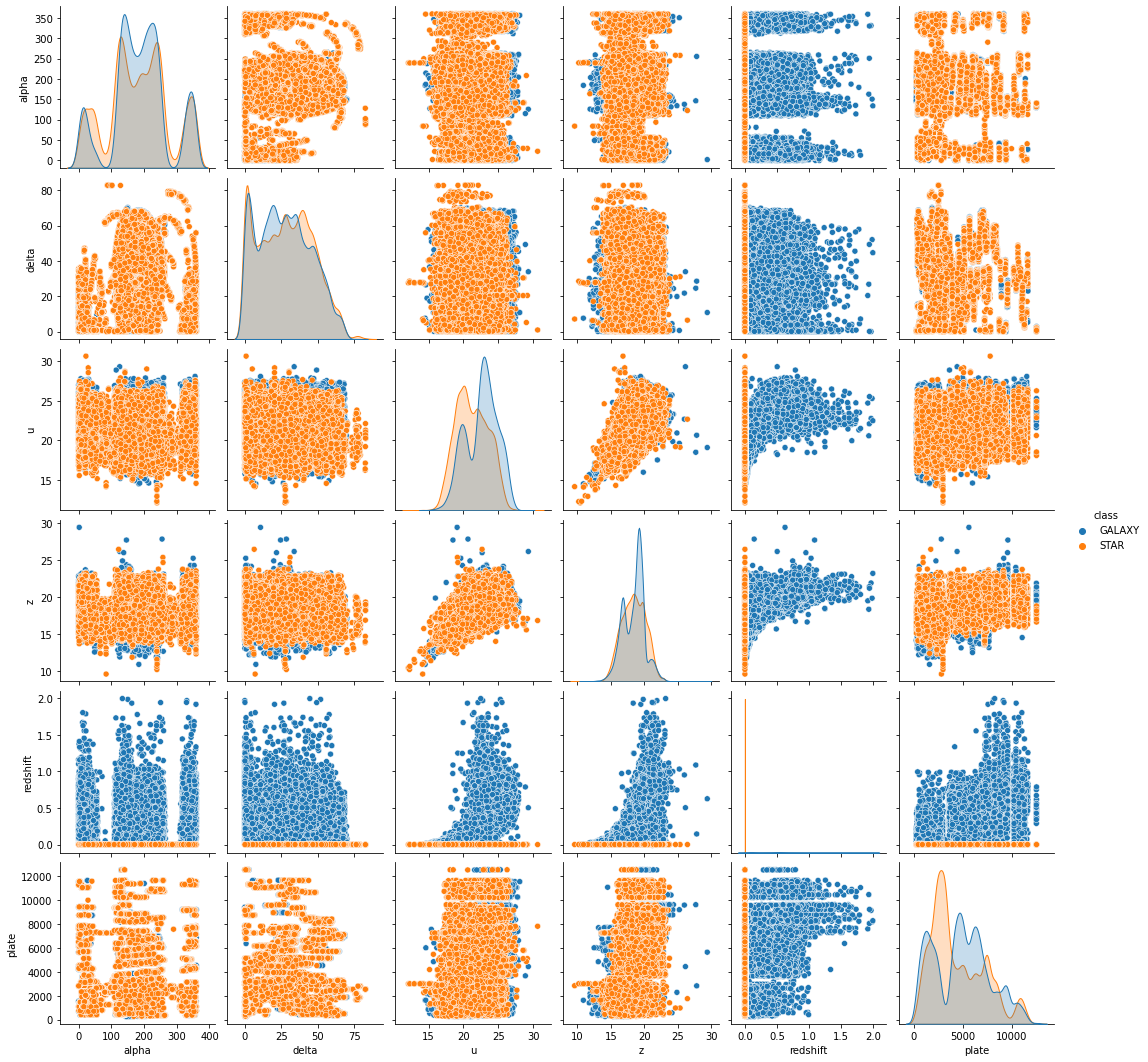

In [43]:
# Plotting pair plots
fig = plt.figure(figsize=(10, 7))
sns.pairplot(df_train, hue="class")
plt.show()

* As most of the data is linearly serprable, I will use Logistic Regression Model with Hyperparamter Lambda set to 1.
* For Logistic Regression, We need to standardize the data.

In [44]:
# Encode class variables Star and Galaxy
def map_class(val):
    if val=="STAR":
        return 1
    else:
        return 0

df_train["class"] = df_train["class"].map(map_class)

In [45]:
# Standardizing the data
X_train = df_train.drop("class", axis=1)
y_train = df_train["class"]

col = X_train.columns
std = StandardScaler()
X_train = pd.DataFrame(std.fit_transform(X_train), columns=col)

In [46]:
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [47]:
acc_train = model.score(X_train, y_train)
print("Model accuracy on the train set is: " + str(round(acc_train, 2)))

Model accuracy on the train set is: 0.99


In [48]:
df_test["class"].value_counts()

GALAXY    14884
STAR       5376
Name: class, dtype: int64

In [49]:
# Handling Imbalance on Test set
under_sampling = RandomUnderSampler(sampling_strategy={"GALAXY": 10000}, random_state=42)
smote = SMOTE(sampling_strategy={"STAR": 10000}, random_state=42)

y_test = df_test["class"]
X_test = df_test.drop("class", axis=1)

X_test, y_test = under_sampling.fit_resample(X_test, y_test)
X_test, y_test = smote.fit_resample(X_test, y_test)

In [50]:
y_test = y_test.map(map_class)
X_test = pd.DataFrame(std.fit_transform(X_test), columns=col)

In [51]:
acc_test = model.score(X_test, y_test)
print("Model accuracy on the test set is: " + str(round(acc_test, 2)))

Model accuracy on the test set is: 0.99


In [52]:
y_testpred = model.predict(X_test)
print(metrics.classification_report(y_test, y_testpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10000
           1       0.98      1.00      0.99     10000

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

